In [1]:
import sys
sys.path.append('/home/germain.rosadio/Work/MyLibraries') # Add my own libraries to python path '/home/germain/Work/MyLibraries'

%matplotlib inline
# %matplotlib
# %matplotlib widget
# %reset -f
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
from numpy import pi
import scipy.constants as cte
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import find_peaks
from time import time
import adios as ad
import postgkyl as pg
import os
# import warnings
# warnings.filterwarnings('ignore')
# from ipywidgets import interact, interactive, fixed, interact_manual, widgets
# import animatplot as amp
from gkeyll import *
from myFunctions import *

Gkeyll module imported


In [2]:
# # To import changes in gkeyll module
# import importlib
# importlib.reload(sys.modules['gkeyll'])
# from gkeyll import *

In [3]:
specie = 'e' # Specie to analyze
Nprueba = 0 # Number of test
toSaveFigure = False
toSaveData = False
FileName = 'prueba' + str(Nprueba) # Name of lua file
# FileName = 'input'
# # PathToData = '/mnt/s/Work/Gkeyll/Inputs/Input' + str(Nprueba) + '/' # Path to gkyl outputs
# PathToData = '/mnt/s/Work/Gkeyll/Pruebas/Prueba' + str(Nprueba) + '/' # Path to gkyl outputs
PathToData = '/home/germain.rosadio/Work/Gkeyll/Pruebas/Prueba' + str(Nprueba) + '/' # Path to gkyl outputs
# PathToData = '/home/germain.rosadio/KikeTests/Tutorial_First/'
InputName = os.path.join(PathToData,FileName) # Full path of lua file
# PathToPlot = os.path.join(PathToData,'Plots') # Path to plot gkyl outputs

# for i in sorted(os.listdir(PathToData)):
#     print(i)
# PathToMatFiles = os.path.join(PathToData,"MatFiles") # Path to export gkyl data as mat files
# if not os.path.isdir(PathToMatFiles):
#     print('The directory is not present. Creating a new one...')
#     os.mkdir(PathToMatFiles)
# else: print('The directory is present. Continuing...')
# FileName = 'vm-damp.lua'
# PathToData = '/mnt/s/Work/Gkeyll/Quickstart/First simulation'
# InputName = os.path.join(PathToData,FileName)

print("Gkeyll configuration file is in path: '{}'".format(PathToData))

Gkeyll configuration file is in path: '/home/germain.rosadio/Work/Gkeyll/Pruebas/Prueba0/'


Remember that the moments are:
$$
    (M_0, M_{1i}, M_{2ij}, M_2, M_{3i}) = \int (1, v_i, v_i v_j, v^2, v^2v_i)f dv
$$

In these diagnostics, the index $i,j$ run over 1 to $V_{dim}$.

In [4]:
lua = readingLuaFile(InputName)
lua['Nt'] = lua['nFrame'] + 1
# dt = tEnd/(Nt)
# w_p = np.sqrt(w_pe**2 + w_pi**2)

 Permitivity of free space: epsilon_0 = 1.0
 Permeability of free space: mu_0 = 1
 Boltzmann constant: k_B = 1
 Elementary charge: e = 1.0
 Speed of light: c = 1
 Ion-electron density ratio: denRatio = 1
 Ion-electron mass ratio: massRatio = 100
 Ion-electron temperature ratio: tempRatio = 0.1
 Electron thermal velocity-light speed ratio: velRatio = 0.05
 Electron charge: q_Elc = -e
 Ion charge: q_Ion = e
 Electron and Ion mass: m_Elc,m_Ion = 1,massRatio
 Electron and Ion number density: n_Elc,n_Ion = 1,denRatio
 Electron temperature: T_Elc = 1
 Ion temperature: T_Ion = tempRatio*T_Elc
 Electron thermal speed: vth_Elc = np.sqrt(k_B*T_Elc/m_Elc)
 Ion thermal speed: vth_Ion = np.sqrt(k_B*T_Ion/m_Ion)
 Electron plasma frequency: w_pe = np.sqrt((q_Elc**2)*n_Elc/(epsilon_0*m_Elc))
 Ion plasma frequency: w_pi = np.sqrt((q_Ion**2)*n_Ion/(epsilon_0*m_Ion))
 Electron debye length: lambda_De = vth_Elc/w_pe
 Bulk flow velocity of the electrons: ux_Elc,uy_Elc,uz_Elc = 0.0,0.0,0.0
 Bulk flow veloci

In [5]:
# from astropy import constants as const
# from astropy import units as u
# from astropy.units import UnitConversionError

# # set floating-point output to True
# u.set_enabled_equivalencies(u.dimensionless_angles())
# u.default_system = u.si

# # define the required units
# Zq = const.e.si
# Zm = const.m_e
# Zt = (1/1e9)*u.s
# Zv = const.c
# Zr = Zv*Zt
# ZE = ((Zm*Zv)/(Zq*Zt)).si
# ZB = (ZE/Zv).si

# try:
#     Zf = ((const.eps0*ZE)/(Zr*Zq*(Zv**3))).si
#     Zn = (Zf*(Zv**3)).si
#     ZT = ((Zm*(Zv**2))/const.k_B).si
#     Zw = np.sqrt((Zn*(Zq**2))/(const.eps0*Zm)).si
#     Zk = (Zw/Zv).si
# except UnitConversionError:
#     print("Unit conversion error occurred.")
    
# # separate the units from the values
# Zq = Zq.value
# Zm = Zm.value
# Zt = Zt.value
# Zv = Zv.value
# Zr = Zr.value
# ZE = ZE.value
# ZB = ZB.value
# Zf = Zf.value
# Zn = Zn.value
# ZT = ZT.value
# Zw = Zw.value
# Zk = Zk.value
    
# m_Elc_dim = m_Elc*Zm
# m_Ion_dim = m_Ion*Zm
# n_Elc_dim = n_Elc*Zn
# n_Ion_dim = n_Ion*Zn
# T_Elc_dim = T_Elc*ZT
# T_Ion_dim = T_Ion*ZT
# vth_Elc_dim = vth_Elc*Zv
# vth_Ion_dim = vth_Ion*Zv

# lambda_De_dim = lambda_De*Zr
# w_pe_dim = w_pe*Zw
# w_pi_dim = w_pi*Zw
# de_dim = const.c/w_pe_dim
# w_p_dim = w_p*Zw
# k_B_dim = const.k_B

# Observando los outputs

In [6]:
from ipywidgets import interact, widgets
def plotting_fs(indFile):
    plt.figure(figsize=(15,10), dpi=100)    
    
    # Plotting distribution function
    fig_fe = plt.subplot(3,2,1)
    iGrid, t, f = get_fs(InputName,specie,indFile)
    plt.title('$f_e$ ,$t\omega_{pe}= %1.4f$'%(t))
    plt.xlabel('$x\'$'), plt.ylabel('$v_x\'$')
    plt.pcolormesh(iGrid[0][:-1], iGrid[1][:-1], f.T, cmap='inferno') # [:,:,Nv//2]
    plt.colorbar()

    # Ploting Electric Field Ex
    fig_E = plt.subplot(3,2,3)
    r, [Ex, Ey, Ez], [Bx, By, Bz] = get_field(InputName,indFile)
    plt.plot(r[0][:-1], Ex, '-', ms=1.0, lw=1)
    plt.ylabel('$E$', fontsize=12)

    # Ploting Zero Moment M0
    fig_ne = plt.subplot(3,2,4)
    r, t, M0 = get_M0s(InputName,specie,indFile)
    ne = M0
    plt.plot(r[0][:-1], ne, '-', ms=1.0, lw=1)
    plt.ylabel('$n_e$', fontsize=12)

    # Ploting First Moment M1
    fig_ve = plt.subplot(3,2,5)
    r, t, M1x = get_M1is(InputName,specie,indFile)
    ve = M1x/ne
    plt.plot(r[0][:-1], ve, '-', ms=1.0, lw=1)
    plt.ylabel('$v_e$', fontsize=12)

    # Ploting Second Moment M2
    fig_Te = plt.subplot(3,2,6)
    r, t, M2 = get_M2s(InputName,specie,indFile)
    Te = M2*(lua['m_Elc']/(ne*lua['k_B']))
    plt.plot(r[0][:-1], Te, '-', ms=1.0, lw=1)
    plt.ylabel('$T_e$', fontsize=12)
interact(plotting_fs, indFile=widgets.IntSlider(min=0,max=lua['nFrame'],step=1,value=0));

interactive(children=(IntSlider(value=0, description='indFile', max=2500), Output()), _dom_classes=('widget-in…

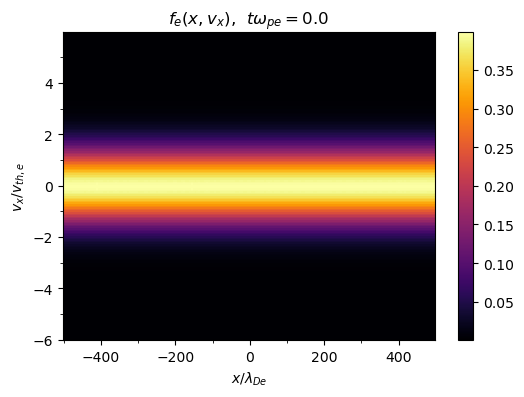

In [7]:
[x, vx], t, f = get_fs(InputName,specie,0)

fig, ax = plt.subplots(figsize=(6,4),dpi=100)
plt.title("$f_e (x,v_x)$,  $t\omega_{pe}= %1.1f$"%(t))
plt.xlabel('$x/\lambda_{De}$'), plt.ylabel("$v_x/v_{th,e}$")
plt.pcolormesh(x[:-1], vx[:-1], f.T, cmap='inferno') # [:,:,Nv//2]
plt.colorbar()
ax.minorticks_on()
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator(2))
plt.show()
# savingFigure(fig,"fe_xv0",toSaveFigure)


# xVal, ind = find_nearest(x,0)
# fig, ax = plt.subplots(figsize=(6,4),dpi=100)
# plt.title("$f_e (x=%1.1f,v_x)$"%(xVal)+",  $t\omega_{pe}= %1.1f$"%(t))
# plt.xlabel('$v_x/v_{th,e}$')
# plt.plot(vx[:-1], f.T[:,ind])
# ax.minorticks_on()
# ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
# ax.yaxis.set_minor_locator(tck.AutoMinorLocator(1))
# plt.show()
# savingFigure(fig,"fe_0v0",toSaveFigure)


# vVal, ind = find_nearest(vx,0)
# fig, ax = plt.subplots(figsize=(6,4),dpi=100)
# plt.title("$f_e (x,v_x=%1.1f)$,"%(vVal)+"  $t\omega_{pe}= %1.1f$"%(t))
# plt.xlabel('$x/\lambda_{De}$')
# plt.plot(x[:-1], f.T[ind,:])
# ax.minorticks_on()
# ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
# ax.yaxis.set_minor_locator(tck.AutoMinorLocator(1))
# plt.show()
# savingFigure(fig,"fe_x00",toSaveFigure)

# Comenzando analisis con la densidad electronica

In [8]:
def GetMoments(Nt=lua['Nt'], outputs='f'):
    '''
    data = GetMoments(Nt=lua['Nt'], outputs='f')
    
    It reads the Gkeyll simulation output files and returns the distribution function, its moments and phase space coordinates.
    
    Parameters
    ----------
    Nt: int, optional
        Frames number of output files to read. Default try to read lua dictionary which should contain number of output files as Nt. 
    outputs: str, optional
        List of data outputs to return. The default is 'f'. 
        The available options are: 'f', 'M0', 'M1', 'M2', 'E', and 'B'. 
        The phase space-time coordinates are always stored
    
    Returns
    -------
    data: dictionary of arrays
        Contains the data requested from outputs input argument, which can be the distribution function, its moments, and the electromagnetic fields, and is stored in a dictionary.
        data['r']: Configuration space coordinates.
        data['v']: Velocity space coordinates.
        data['t']: Time vector.
        data['fs_rvt']: Distribution function of specie s.
        data['M0s_rt']: Zero moment of distribution function of specie s.
        data['M1is_rt']: First moment of distribution function of specie s.
        data['M2s_rt']: Second moment of distribution function of specie s.
        data['E_rt']: Three dimensional electric field [Ex, Ey, Ez].
    '''
    # Check which outputs are requested
    is_f = is_M0 = is_M1 = is_M2 = is_E = is_B = False
    if "f" in outputs: is_f = True; print("Getting distribution function")
    if "M0" in outputs: is_M0 = True; print("Getting zero moment of distribution function")
    if "M1" in outputs: is_M1 = True; print("Getting first moment of distribution function")
    if "M2" in outputs: is_M2 = True; print("Getting second moment of distribution function")
    if "E" in outputs: is_E = True; print("Getting electric field")
    if "B" in outputs: is_B = True; print("Getting magnetic field")
    if outputs == "all": is_f = is_M0 = is_M1 = is_M2 = is_E = is_B = True
    # Read the first output file to get phase space coordinates shape
    [r,v], t, f = get_fs(InputName,specie,0)
    Nr = r.shape[0]
    Nv = v.shape[0]
    # Initialize the data dictionary items
    t = np.empty(Nt)
    fs = np.empty((Nr-1,Nv-1,Nt))
    M0s = np.empty((Nr-1,Nt))
    M1is = np.empty((Nr-1,Nt))
    M2s = np.empty((Nr-1,Nt))
    Ex = np.empty((Nr-1,Nt))
    for indFile in range(0,Nt):
        if is_f: _, t[indFile], fs[:,:,indFile] = get_fs(InputName,specie,indFile)
        if is_M0: _, t[indFile], M0s[:,indFile]  = get_M0s(InputName,specie,indFile)
        if is_M1: _, t[indFile], M1is[:,indFile] = get_M1is(InputName,specie,indFile)
        if is_M2: _, t[indFile], M2s[:,indFile] = get_M2s(InputName,specie,indFile)
        if is_E: _, [Ex[:,indFile], Ey, Ez], [Bx, By, Bz] = get_field(InputName,indFile)
    
    data = {"r": r, "v": v, "t": t, "fs_rvt": fs, "M0s_rt": M0s, "M1is_rt": M1is, "M2s_rt": M2s, "E_rt": Ex}
    return data

In [9]:
data = GetMoments(outputs=["M0","E"])
x = data["r"]; vx = data["v"]; t = data["t"]
# fs_xvt = data["fs_rvt"]; 
M0s_xt = data["M0s_rt"]; #M1is_xt = data["M1is_rt"]; M2s_xt = data["M2s_rt"]
Ex_xt = data["E_rt"]
ne_xt = M0s_xt
# ve_xt = (M1is_xt/ne_xt)
# Te_xt = (lua["m_Elc"]*M2s_xt/(ne_xt*lua["k_B"]))

Getting zero moment of distribution function
Getting electric field


In [12]:
# # Ploting Electric Field Ex
# fig = plt.figure(figsize=(8,6),dpi=100)
# ax_E = fig.add_subplot(2,1,1)
# ax_E.plot(r[:-1]/lambda_De, Ex_xt.T[0,:], '-', ms=1.0, lw=1)
# ax_E.minorticks_on()
# ax_E.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
# ax_E.yaxis.set_minor_locator(tck.AutoMinorLocator(1))
# plt.ylabel('$E_x$', fontsize=12)
# plt.title("$t\omega_{pe}= %1.1f$"%(0))

# # Ploting Zero Moment M0
# ax_ne = fig.add_subplot(2,1,2)
# ax_ne.plot(r[:-1]/lambda_De, ne_xt.T[0,:], '-', ms=1.0, lw=1)
# plt.xlabel("$x/\lambda_{De}$")
# plt.ylabel('$n_e$', fontsize=12)
# ax_ne.minorticks_on()
# ax_ne.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
# ax_ne.yaxis.set_minor_locator(tck.AutoMinorLocator(1))
# plt.show()
# savingFigure(fig,"initial",toSaveFigure)

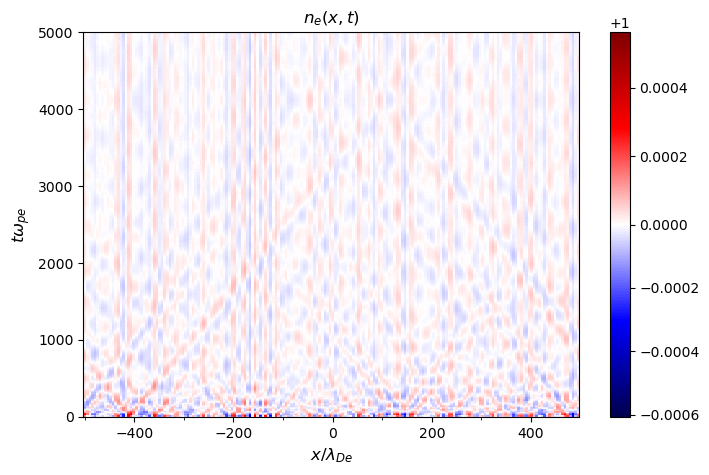

In [10]:
# ne_0 = np.mean(ne_xt,axis=(0,1))
fig, ax = plt.subplots(figsize=(8,5),dpi=100)
divnorm=colors.TwoSlopeNorm(vmin=np.min(ne_xt), vcenter=lua['n_Elc'], vmax=np.max(ne_xt))
plt.pcolormesh(x[:-1]/lua["lambda_De"],t*lua["w_pe"],ne_xt.T,cmap='seismic',norm=divnorm)
plt.colorbar()
plt.xlabel('$x/\lambda_{De}$',fontsize=12), plt.ylabel('$t\omega_{pe}$',fontsize=12)
plt.title('$n_e(x,t)$',fontsize=12)
ax.minorticks_on()
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator(1))
# plt.ylim([0, 2000])
plt.show()
# savingFigure(fig,"ne_xt",toSaveFigure)

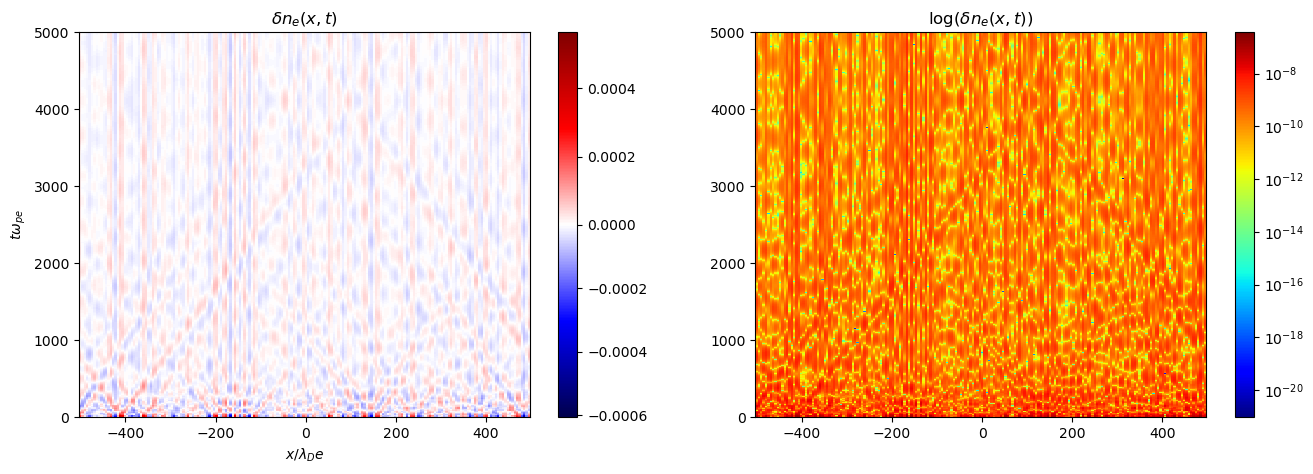

In [17]:
ne_0 = lua["n_Elc"] # np.mean(ne_xt,axis=(0,1))
f_xt = ne_xt - ne_0 # Haciendo que ne oscile alrededor de 0
[_, t_0] = find_nearest(t,0)
f_xt = f_xt[:,t_0:]
time = t[t_0:]
# Graficando la funcion asignada a f_xt
plt.figure(figsize=(16,5),dpi=100)

plt.subplot(1,2,1)
divnorm=colors.TwoSlopeNorm(vmin=np.min(f_xt), vcenter=0., vmax=np.max(f_xt))
plt.pcolormesh(x[:-1]/lua["lambda_De"],t[t_0:]*lua["w_pe"],f_xt.T,cmap='seismic',norm=divnorm) # [:50,:]
plt.colorbar()
plt.xlabel('$x/\lambda_De$'), plt.ylabel('$t\omega_{pe}$')
plt.title('$\delta n_e(x,t)$')
# plt.ylim(0,500)

plt.subplot(1,2,2)
plt.pcolormesh(x[:-1]/lua["lambda_De"],t[t_0:]*lua["w_pe"],(f_xt.T)**2,cmap='jet',
               norm=colors.LogNorm(vmin=np.min(f_xt**2), vmax=np.max(f_xt**2)))
plt.title('$\log(\delta n_e(x,t))$')
plt.colorbar()
plt.show()

# Aplicando Transformadas de Fourier

## Segun Referencia

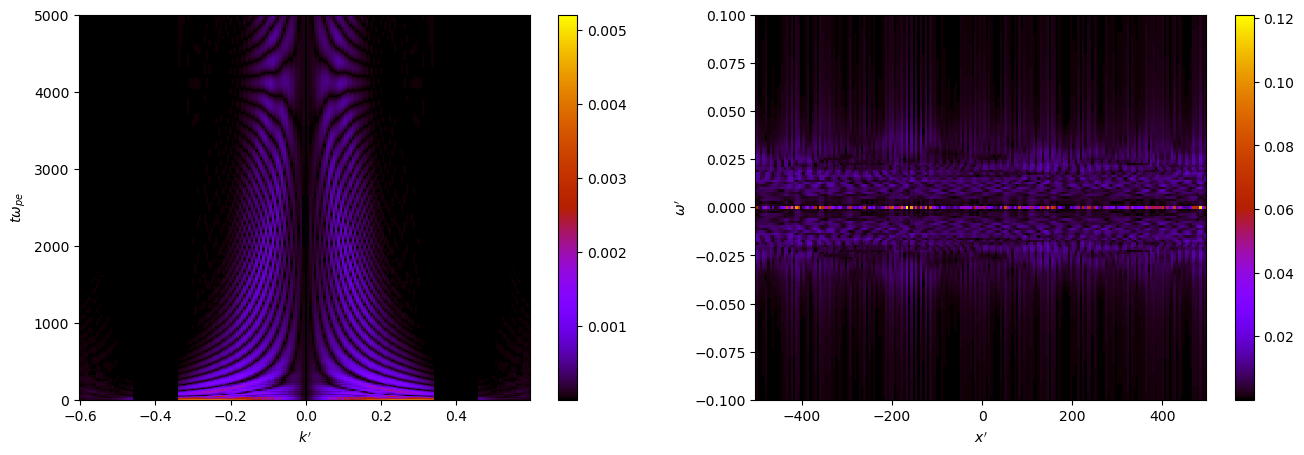

In [18]:
f_kt = np.fft.fftshift(np.fft.fft(f_xt, axis=0), axes=0)
f_kt = f_kt - np.mean(f_kt,1)[:, np.newaxis]
f_xw = np.fft.fftshift(np.fft.fft(f_xt, axis=1), axes=1)
f_kw = np.fft.fftshift(np.fft.fft(f_kt, axis=1), axes=1)
dx = np.mean(np.diff(x))
k = 2*pi*np.fft.fftshift(np.fft.fftfreq(x.size,dx))
dt = np.mean(np.diff(time))
f = np.fft.fftshift(np.fft.fftfreq(len(time),dt))
w = 2*pi*f

plt.figure(figsize=(16,5),dpi=100)

plt.subplot(1,2,1)
plt.pcolormesh(k[:-1], time, (np.abs(f_kt).T), cmap='gnuplot')
plt.xlabel('$k\'$'), plt.ylabel('$t\omega_{pe}$')
plt.colorbar()

plt.subplot(1,2,2)
plt.pcolormesh(x[:-1],w,(np.abs(f_xw).T), cmap='gnuplot')
plt.xlabel('$x\'$'), plt.ylabel('$\omega\'$')
plt.ylim([-0.1,0.1])
plt.colorbar()
plt.show()

In [19]:
def plotting_f_kw(j):
    print(k[j]*lua["lambda_De"])
    plt.figure(figsize=(16,10), dpi=200)
    # plt.subplots_adjust(wspace=0.5)
    plt.subplot(2,2,1)
    plt.pcolormesh(k[:-1]*lua["lambda_De"], w/lua["w_pe"], (np.abs(f_kw.T)), cmap='gnuplot') # , vmin=0, vmax=2
    plt.xlabel('$k\'$'), plt.ylabel('$\omega\'$')
    plt.title('$S(k\',\omega\')$')
    plt.vlines(k[j]*lua["lambda_De"], ymin=w[0]/lua["w_pe"], ymax=w[-1]/lua["w_pe"], colors='w',ls='--')
    plt.colorbar()

    plt.subplot(2,2,2)
    plt.plot(w/lua["w_pe"], (np.abs(f_kw.T)[:,j]), 'r.-', lw=0.5, ms=1.0)
    plt.xlabel('$\omega\'$')
    plt.ylabel('$S(\omega\')$')
    # plt.xlim([-0.5,0.5])
    # plt.ylim([0.2, 0.3])

    plt.subplot(2,2,3)
    plt.pcolormesh(k[:-1]*lua["lambda_De"],w/lua["w_pe"], (np.abs(f_kw.T)),cmap='gnuplot',
                   norm=colors.LogNorm(vmin=np.abs(f_kw).min(), vmax=np.abs(f_kw).max()))
    plt.colorbar()
    plt.xlabel('$k$'), plt.ylabel('$\omega$')
    plt.title('$n_e(k,t)$')
    plt.vlines(k[j]*lua["lambda_De"], ymin=w[0]/lua["w_pe"], ymax=w[-1]/lua["w_pe"], colors='k',ls='--')

    plt.subplot(2,2,4)
    plt.semilogy(w/lua["w_pe"], (np.abs(f_kw.T)[:,j]), 'r.-', lw=0.5, ms=1.0)
    # plt.xlim(np.array([w[0],w[-1]])/10)

    plt.show()
_, indk0 = find_nearest(k*lua["lambda_De"],0)
interact(plotting_f_kw, j=widgets.IntSlider(min=0, max=k.size-1, step=1, value=indk0))
plt.show()

interactive(children=(IntSlider(value=96, description='j', max=192), Output()), _dom_classes=('widget-interact…

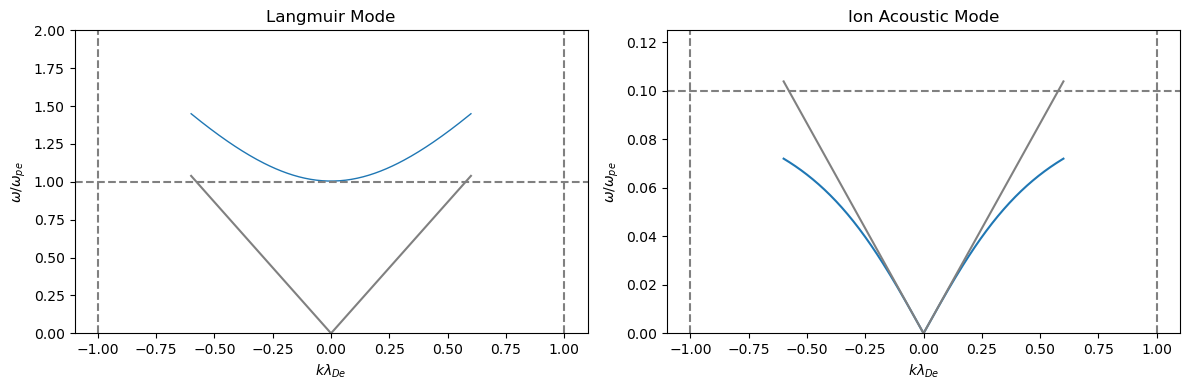

In [37]:
y_e, y_i = 3, 3
w_e, w_i = dispersion_modes(k, [y_e, y_i], lua, to_aproximate=True, to_plot=True)

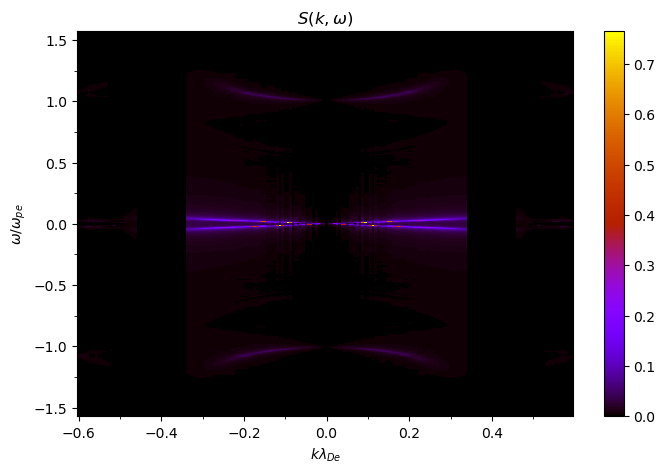

In [21]:
fig, ax = plt.subplots(figsize=(8,5),dpi=100)
plt.pcolormesh(k[:-1]*lua['lambda_De'], w/lua['w_pe'], (np.abs(f_kw.T)), cmap='gnuplot') # , vmin=0, vmax=2
# plt.plot(k0,w1,'w-',lw=0.5)
# plt.plot(k0,w2,'w-',lw=0.5)
plt.xlabel('$k\lambda_{De}$'), plt.ylabel('$\omega/\omega_{pe}$')
plt.title('$S(k,\omega)$')
# plt.vlines(k[j], ymin=w[0], ymax=w[-1], colors='k',ls='--')
plt.colorbar()
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.2,0.2)
# plt.ylim(0.8, 1.2)
ax.minorticks_on()
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator(2))
plt.show()
# fig.savefig(os.path.join(PathToPlot,"prueba"+str(Nprueba)+"-S_kw.png"),dpi=1200,bbox_inches='tight',transparent=True, pad_inches=0)
# fig.savefig(os.path.join(PathToPlot,"prueba"+str(Nprueba)+"-S_kw.eps"),dpi=1200,bbox_inches='tight',transparent=True, pad_inches=0)
# savingFigure(fig,"S_kw",toSaveFigure)

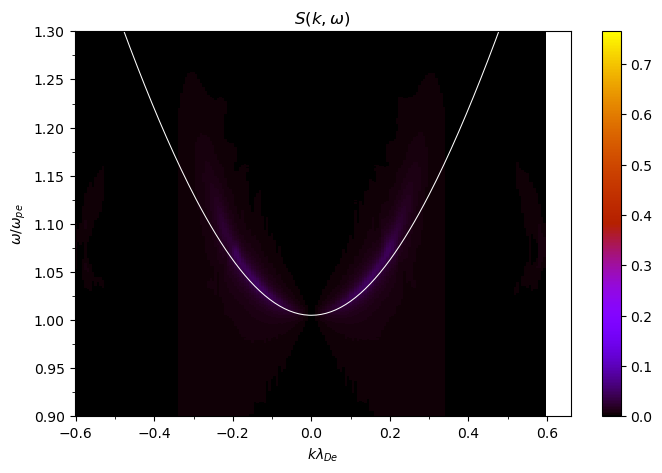

In [25]:
# y_e = 3.5
# w1 = np.sqrt(lua['w_pe']**2*(1+y_e*(lua['lambda_De']*k)**2))
fig, ax = plt.subplots(figsize=(8,5),dpi=100)
plt.pcolormesh(k[:-1]*lua['lambda_De'], w/lua['w_pe'], (np.abs(f_kw.T)), cmap='gnuplot') # , vmin=0, vmax=2
plt.plot(k*lua['lambda_De'],w_e/lua['w_pe'],'w-',lw=0.75)
plt.xlabel('$k\lambda_{De}$'), plt.ylabel('$\omega/\omega_{pe}$')
plt.title('$S(k,\omega)$')
plt.colorbar()
# plt.xlim(-0.1,0.1)
plt.ylim(0.9, 1.3)
ax.minorticks_on()
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator(2))
plt.show()
# fig.savefig(os.path.join(PathToPlot,"prueba"+str(Nprueba)+"-S_kw_LangmuirMode.png"),dpi=1200,bbox_inches='tight',transparent=True, pad_inches=0)
# fig.savefig(os.path.join(PathToPlot,"prueba"+str(Nprueba)+"-S_kw_LangmuirMode.eps"),dpi=1200,bbox_inches='tight',transparent=True, pad_inches=0)
# savingFigure(fig,"S_kw_LangmuirMode",toSaveFigure)

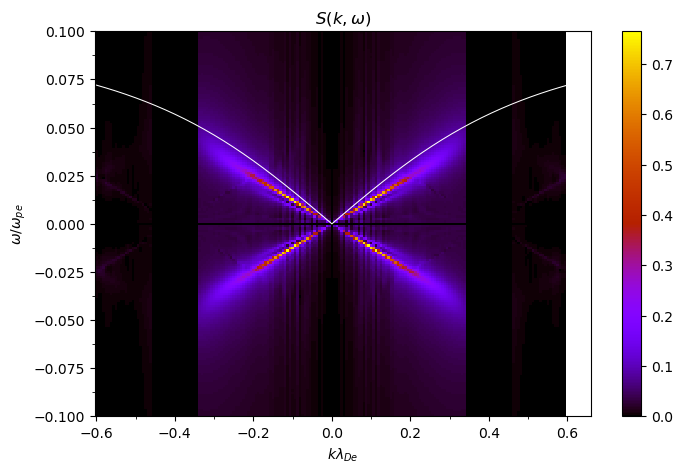

In [38]:
# y_e = 1.5
# w2 = np.sqrt((1/(1+y_e*lambda_De**2*k**2))*(y_e*k_B*T_Elc/m_Ion)*k**2)
fig, ax = plt.subplots(figsize=(8,5),dpi=100)
plt.pcolormesh(k[:-1]*lua["lambda_De"], w/lua["w_pe"], (np.abs(f_kw.T)), cmap='gnuplot') # , vmin=0, vmax=2
plt.plot(k*lua["lambda_De"],w_i/lua["w_pe"],'w-',lw=0.75)
plt.xlabel('$k\lambda_{De}$'), plt.ylabel('$\omega/\omega_{pe}$')
plt.title('$S(k,\omega)$')
plt.colorbar()
# plt.xlim(-0.1,0.1)
plt.ylim(np.array([-1,1])*lua["w_pi"])
ax.minorticks_on()
ax.xaxis.set_minor_locator(tck.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator(2))
plt.show()
# savingFigure(fig,"S_kw_IonAcusticMode",toSaveFigure)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

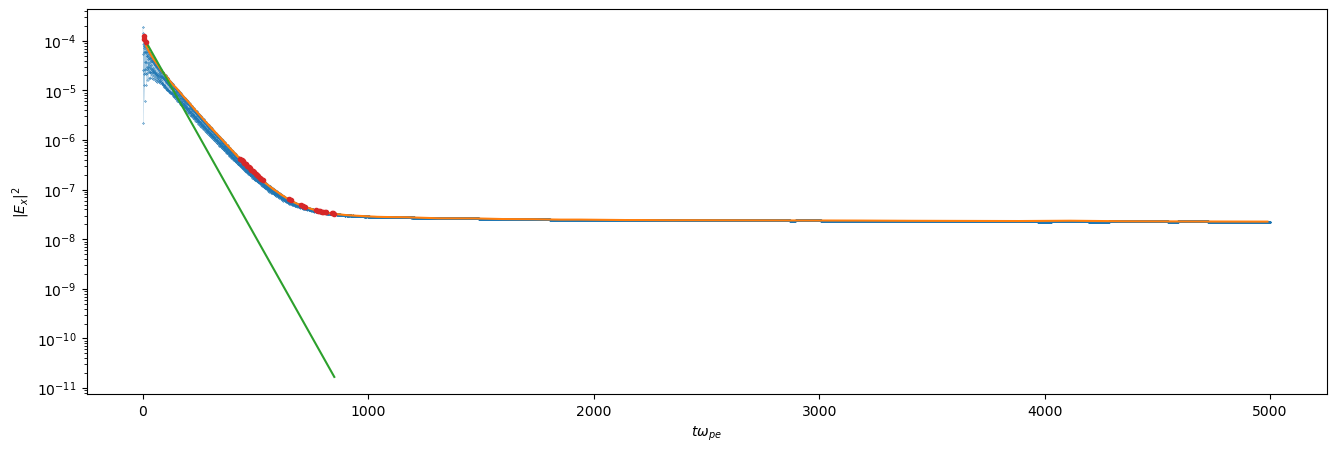

In [19]:
import scipy.optimize as opt
from scipy.signal import hilbert
from IPython.display import display, Latex

def exp2(x, a, b): 
    return a*np.exp(b*x)
from scipy.signal import argrelextrema


FileName = InputName + '_fieldEnergy.bp'
data = pg.data.GData(FileName)
interp = pg.data.GInterpModal(data, 1, 'ms')
Grid, Ex2 = interp.interpolate()
Ex = Ex2[:,0][:-1]
time = Grid[0]

def getDampingRate(t,Ex):
    # maxInd = argrelextrema(Ex2, np.greater)[0]
    maxInd, _ = find_peaks(Ex)
    ExMax = Ex[maxInd]
    tMax = t[maxInd]
    
    # maxInd2 = argrelextrema(Ex2Max, np.greater)[0]
    maxInd2, _ = find_peaks(ExMax)
    ExMax2 = ExMax[maxInd2]
    tMax2 = tMax[maxInd2]
    
    nPoints = maxInd2.shape[0]//2
    if(nPoints == 0):
        nPoints = maxInd2.shape[0]
    
    xdata = tMax2[:nPoints]
    ydata = ExMax2[:nPoints]
    if(nPoints<5):
        ExMax2 = np.insert(ExMax2,0,ExMax[0])
        tMax2 = np.insert(tMax2,0,tMax[0])
    nExtraPoints = 1
    xdata = np.insert(tMax2[:nPoints],0,tMax[0:nExtraPoints])
    ydata = np.insert(ExMax2[:nPoints],0,ExMax[0:nExtraPoints])
    nPoints += nExtraPoints 
    
    params , covariance = opt.curve_fit(exp2 , xdata, ydata, p0=(1e-3, -0.01))
    residuals = ydata - exp2(xdata, *params) 
    ss_res = np.sum(residuals**2) # residual sum of squares
    ss_tot = np.sum((ydata-np.mean(ydata))**2) # total sum of squares 
    r2 = 1 - (ss_res / ss_tot) # r squared
    Ex_fitted = exp2(xdata, *params)
    y = params[1]
        
    if((r2<0.980 and nPoints>=2) or (nPoints==2)):
        print("1")
        idx = xdata<=100*lua["w_pe"]
        xdata, ydata = xdata[idx], ydata[idx]
        nPoints = xdata.shape[0]
        if(nPoints<2):
            print("2")
            nPoints = 10
            xdata = tMax[:nPoints]
            ydata = ExMax[:nPoints]
            
            nExtraPoints = 1
            xdata = np.insert(xdata,0,tMax[0:nExtraPoints])
            ydata = np.insert(ydata,0,ExMax[0:nExtraPoints])
            nPoints += nExtraPoints 
            
            idx = xdata<=100*lua["w_pe"]
            xdata, ydata = xdata[idx], ydata[idx]
            nPoints = xdata.shape[0]
        
        params , covariance = opt.curve_fit(exp2 , xdata, ydata, p0=(1e-3, -0.01))
        residuals = ydata - exp2(xdata, *params) 
        ss_res = np.sum(residuals**2) # residual sum of squares
        ss_tot = np.sum((ydata-np.mean(ydata))**2) # total sum of squares 
        r2 = 1 - (ss_res / ss_tot) # r squared
        Ex_fitted = exp2(xdata, *params)
        y = params[1]    
    
    return y, r2, xdata, ydata, Ex_fitted, maxInd, maxInd2, nPoints

[y, r2, xdata, ydata, Ex_fitted, maxInd, maxInd2, nPoints] = getDampingRate(time,Ex)
display(Latex("Data length: "+str(maxInd2.shape[0])+" | nPoints: "+str(nPoints)))
display(Latex("Damping rate: "+str(y)))
display(Latex("$R^2:$ "+str(r2)))

ExMax = Ex[maxInd]
tMax = time[maxInd]

plt.figure(figsize=(16,5), dpi=100)
plt.semilogy(time, Ex, '.-', ms=0.5, lw=0.1)
plt.plot(tMax,ExMax,'-')
plt.plot(xdata, Ex_fitted)
plt.plot(xdata,ydata,'.')
# plt.plot(tMax[:N],np.abs(analytic_Ex2))
plt.ylabel('$|E_x|^2$'), plt.xlabel('$t\omega_{pe}$')
# plt.xlim([0, 500])
plt.show()

In [15]:
z_xt = Ex_xt.T
z_kt = np.fft.fftshift(np.fft.fft(z_xt, axis=1), axes=1)
dx = np.mean(np.diff(x))
k = 2*pi*np.fft.fftshift(np.fft.fftfreq(x.size-1,dx))
def ploting_Ex2_kt(j):
    plt.figure(figsize=(16,5),dpi=100)

    plt.subplot(1,2,1)
    plt.pcolormesh(k, t, (np.abs(z_kt)), cmap='plasma') # , vmin=0, vmax=2
    plt.xlabel('$k$'), plt.ylabel('$t$')
    plt.title('$|E_x(k,t)|^2$')
    plt.vlines(k[j], ymin=t[0], ymax=t[-1], colors='k',ls='--')
    plt.colorbar()

    plt.subplot(1,2,2)
    plt.semilogy(t, (np.abs(z_kt)[:,j]), '.-', ms=1, lw=0.5)
    plt.xlabel('$t$'), plt.ylabel('$|E_x|^2$')
    # plt.xlim([0, 200])
    plt.show()
interact(ploting_Ex2_kt, j=(0,k.size-1,1))

interactive(children=(IntSlider(value=95, description='j', max=191), Output()), _dom_classes=('widget-interact…

<function __main__.ploting_Ex2_kt(j)>

In [27]:
lua["w_p"] = lua["w_pe"]**2 + lua["w_pi"]**2
import scipy.optimize as opt
def exp2(x, a, b): 
    return a*np.exp(b*x)
from scipy.signal import argrelextrema

y = np.zeros(np.shape(k))
for j in range(0,np.size(k)):
    [y[j],_,_,_,_,_,_,_] = getDampingRate(t,np.abs(z_kt)[:,j])
    
k0 = np.append(np.linspace(-1,-0.15,100),np.linspace(0.15,1,100))/lua["lambda_De"]
y0 = -np.sqrt(pi/8)*(lua["w_p"]/np.abs(k0*lua["lambda_De"])**3)*np.exp(-1/(2*(k0*lua["lambda_De"])**2) - 3/2)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


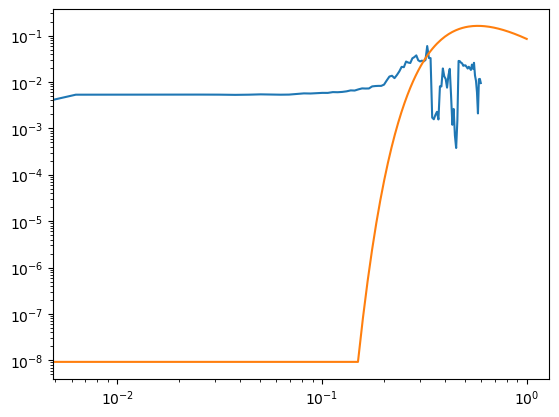

In [28]:
plt.loglog(k*lua["lambda_De"],-y/lua["w_p"]) # hilbert transform
plt.loglog(k0*lua["lambda_De"],-y0/lua["w_p"])
# plt.ylim([1e-4,1])
# plt.xlim([-0.5,0.5])

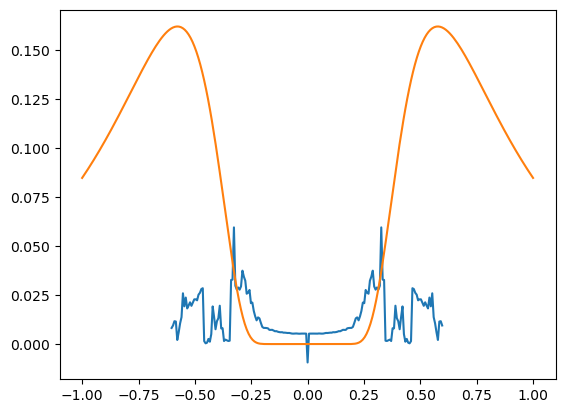

In [29]:
plt.plot(k*lua["lambda_De"],-y/lua["w_p"]) # hilbert transform
plt.plot(k0*lua["lambda_De"],-y0/lua["w_p"])
# plt.xlim([-0.5,0.5])

In [ ]:
import scipy.cteants as cte
import astropy.units as u
from astropy import cteants as cte
import matplotlib.pyplot as plt
import numpy as np

from plasmapy.diagnostics import thomson

me = cte.m_e.si
mi = 100*cte.m_e.si
ne = 1e11 * u.m**-3
vthe = 0.05*cte.c
vthi = 0.001*cte.c
# Te = 2000 * u.K
# Ti = 1000 * u.K
Te = (me*vthe**2/cte.k_B).si
Ti = (mi*vthi**2/cte.k_B).si

lambda_De_dim = np.sqrt(cte.eps0*cte.k_B*Te/(ne*cte.e.si**2)).si
w_pe_dim = np.sqrt(ne*cte.e.si**2/(cte.eps0*me)).si
# vth_e = lambda_De*w_pe.si
de_dim = cte.c/w_pe_dim.si

Zq = cte.e.si
Zm = cte.m_e.si
Zt = 1/w_pe_dim
Zv = cte.c
Zr = Zv*Zt
ZE = (Zm*Zv/(Zq*Zt)).si
ZB = ZE/Zv
Zf = (cte.eps0.si*ZE/(Zr*Zq*Zv**3)).si
Zn = Zf*Zv**3
ZT = (Zm*Zv**2/cte.k_B).si
Zw = np.sqrt(Zn*Zq**2/(cte.eps0*Zm))
Zk = (Zw/Zv).si
ZS = Zf/Zk

m_Elc_dim = m_Elc*Zm
q_Elc_dim = q_Elc*Zq
tEnd_dim = tEnd*Zt
vth_Elc_dim = vth_Elc*Zv
T_Elc_dim = T_Elc*ZT
T_Ion_dim = T_Ion*ZT
n_Elc_dim = n_Elc*Zn
w_pi_dim = (w_pi*Zw).si